In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataminer fiverr resume 2020-08-26 - raw.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1150 non-null   object
 1   Level        828 non-null    object
 2   Description  1104 non-null   object
 3   Rating       1058 non-null   object
 4   Price        1104 non-null   object
 5   Link         1104 non-null   object
dtypes: object(6)
memory usage: 54.0+ KB


In [4]:
df.nunique(axis=0)

Name           48
Level           3
Description    47
Rating         45
Price          30
Link           48
dtype: int64

In [9]:
#check for Nans
for cols in df.columns:
    print(f'{cols} has {df[cols].isnull().sum()} NANs')


Name has 0 NANs
Level has 322 NANs
Description has 46 NANs
Rating has 92 NANs
Price has 46 NANs
Link has 46 NANs
Raters has 92 NANs


In [5]:
#get rid of peso sign
df.Price = df.Price.str.replace('Starting at','').str.replace('₱','')

In [6]:
#split rating
df[['Rating', 'Raters']] = df.Rating.str.split('(', n = 1, expand = True)

In [7]:
#get rid of )
df.Raters = df.Raters.str.replace(')','')

In [ ]:
df.head()

In [10]:
#get rid of those without descriptions
df = df.loc[-df.Description.isna(), :]

In [11]:
#get rid of those without ratings
df = df.loc[-df.Rating.isna(),:]

In [12]:
#replace NAN in Levels with Level None
df['Level'].fillna('Level none', inplace=True)

In [13]:
df.Rating = df.Rating.astype('float')

In [14]:
#get rid of commas
df.Price = df.Price.str.replace(',','')
df.Raters = df.Raters.str.replace(',','')

In [15]:
df.Price = df.Price.astype('float')

In [16]:
df.Raters.unique()

array(['132', '131', '277', '61', '8', '66', '470', '53', '120', '26',
       '1k+', '2', '7', '75', '43', '16', '436', '560', '52', '162',
       '105', '4', '14', '57', '22', '64', '434', '92', '23', '155', '60',
       '83', '18', '40', '77', '6', '170', '399', '13', '1', '3', '17'],
      dtype=object)

In [17]:
df.Raters = df.Raters.str.replace(r'k\+','000')
df.Raters = df.Raters.astype('int32')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1058 non-null   object 
 1   Level        1058 non-null   object 
 2   Description  1058 non-null   object 
 3   Rating       1058 non-null   float64
 4   Price        1058 non-null   float64
 5   Link         1058 non-null   object 
 6   Raters       1058 non-null   int32  
dtypes: float64(2), int32(1), object(4)
memory usage: 62.0+ KB


In [19]:
df.nunique(axis=0)

Name           44
Level           4
Description    45
Rating          4
Price          29
Link           46
Raters         42
dtype: int64

In [20]:
#check for Nans
for cols in df.columns:
    print(f'{cols} has {df[cols].isnull().sum()} NANs')

Name has 0 NANs
Level has 0 NANs
Description has 0 NANs
Rating has 0 NANs
Price has 0 NANs
Link has 0 NANs
Raters has 0 NANs


In [21]:
by_level = df.groupby('Level')

histogram 'Level 1 Seller'
histogram 'Level 2 Seller'


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

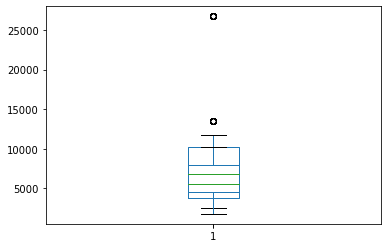

In [49]:
for level, frame in by_level:
    
    print(f"histogram {level!r}")
    frame.Price.plot.box()
#    print('----------------------')
#    print('frame.head(2)', end = '\n\n')


In [28]:
by_level.get_group('Level 1 Seller')

,Name,Level,Description,Rating,Price,Link,Raters
1,by acoel002,Level 1 Seller,"I will professionally write, edit, or revamp y...",4.9,2547.0,https://www.fiverr.com/acoel002/professionally...,131
5,by heathermkresume,Level 1 Seller,"I will write you a modern, millennial resume",5.0,11715.0,https://www.fiverr.com/heathermkresume/write-y...,66
9,by emmanuelgendre,Level 1 Seller,I will write your professional resume targeted...,5.0,26740.0,https://www.fiverr.com/emmanuelgendre/craft-an...,26
28,by ashozda,Level 1 Seller,I will create your professional engineering re...,4.9,10187.0,https://www.fiverr.com/ashozda/create-your-pro...,22
32,by lawyerfreelance,Level 1 Seller,"I will design, edit, or create your profession...",4.9,7640.0,https://www.fiverr.com/lawyerfreelance/lawyer-...,23
...,...,...,...,...,...,...,...
1133,by haris_hassan,Level 1 Seller,"I will improve, rewrite and design resume, cv",4.9,4330.0,https://www.fiverr.com/haris_hassan/design-res...,155
1136,by atfirstglance_,Level 1 Seller,"I will provide professional resume writing, in...",4.7,3566.0,https://www.fiverr.com/atfirstglance_/help-you...,18
1142,by jmillhau,Level 1 Seller,I will write an entry level engineering resume,4.9,9932.0,https://www.fiverr.com/jmillhau/write-a-profes...,13
1146,by au_it_pro,Level 1 Seller,"I will edit, write, design your IT cv, cover l...",4.9,6112.0,https://www.fiverr.com/au_it_pro/edit-write-de...,17


<AxesSubplot:ylabel='Frequency'>

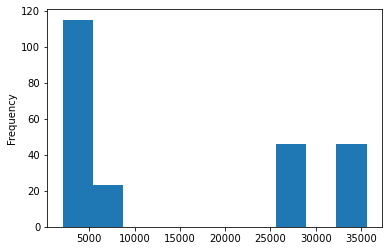

In [39]:
by_level.get_group('Level none').Price.plot.hist()

<AxesSubplot:ylabel='Frequency'>

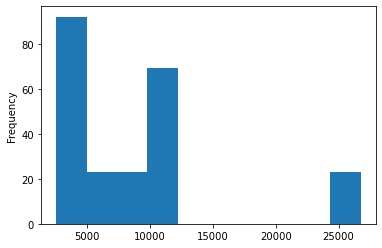

In [52]:
%matplotlib inline
by_level.get_group('Level 1 Seller').Price.plot.hist()

In [53]:
by_level.get_group('Level 1 Seller').Price.describe()

count      230.000000
mean      8658.900000
std       6746.650634
min       2547.000000
25%       3820.000000
50%       6876.000000
75%      10187.000000
max      26740.000000
Name: Price, dtype: float64

<AxesSubplot:>

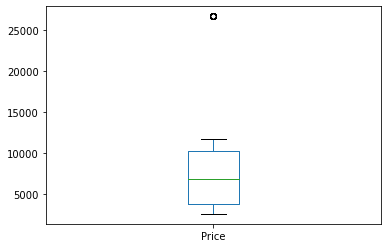

In [54]:
by_level.get_group('Level 1 Seller').Price.plot.box()

<AxesSubplot:ylabel='Frequency'>

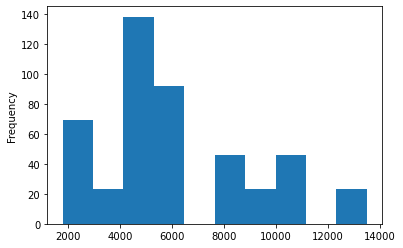

In [40]:
by_level.get_group('Level 2 Seller').Price.plot.hist()

In [55]:
by_level.get_group('Level 2 Seller').Price.describe()

count      460.000000
mean      6150.450000
std       2971.154916
min       1783.000000
25%       4520.500000
50%       5603.000000
75%       7958.750000
max      13497.000000
Name: Price, dtype: float64

<AxesSubplot:>

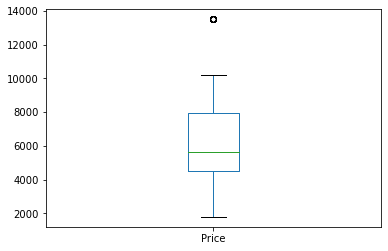

In [56]:
by_level.get_group('Level 2 Seller').Price.plot.box()

<AxesSubplot:ylabel='Frequency'>

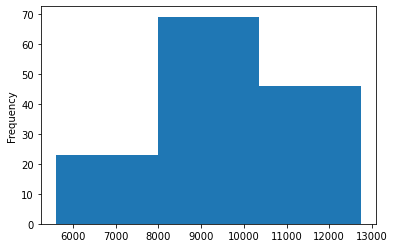

In [45]:
by_level.get_group('Top Rated Seller').Price.plot.hist(bins = 3)

In [47]:
by_level.get_group('Top Rated Seller').Price.describe()

count      138.000000
mean      9507.666667
std       2186.947282
min       5603.000000
25%       8404.000000
50%       9805.000000
75%      10696.000000
max      12733.000000
Name: Price, dtype: float64

<AxesSubplot:>

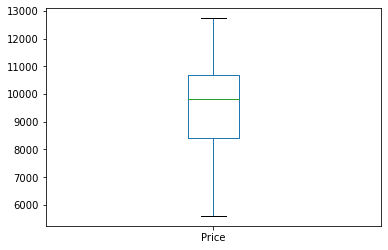

In [48]:
by_level.get_group('Top Rated Seller').Price.plot.box()

In [ ]:
df.groupby('Level')['Price'].mean()